# Project| Wrangle and Analyze 'WeRateDogs' Data
#### By: Muhammed Abdul-Fattah Salem

## Data Gathering

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import requests
import json
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Twitter archive enhanced.csv File
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Read Tweet Image Predictions.tsv File
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name= url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, mode ='wb') as f:
        f.write(response.content)
image_predictions_df = pd.read_csv(file_name, sep='\t')

In [4]:
# Read Tweet_json.txt File
df_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_status = json.loads(line)
        tweet_id = tweet_status['id']
        retweet_count = tweet_status['retweet_count']
        fav_count = tweet_status['favorite_count']  
        followers_count = tweet_status['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': fav_count,
                        'followers_count': followers_count})
api_df= pd.DataFrame(df_list)

NOTE TO REVIEWER: I had mobile verification issues so the following
Twitter API code was sent to me from a Udacity instructor:Tweet IDs 
For which to gather additional data via Twitter's API!
```
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive_df.tweet_id.values
len(tweet_ids)
Query Twitter's API for JSON Data For each Tweet ID in The Twitter Archive
count = 0
fails_dict = {}
start = timer()
Save each Tweet's returned JSON as a New Line in Tweet_json.txt File
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
         count += 1
         print(str(count) + ": " + str(tweet_id))
         try:
             tweet = api.get_status(archive_df.tweet_id, tweet_mode='extended')
             print("Success")
             json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) ```

## Data Assessing 

#### Visual Assessment: each piece of gathered data is displayed in the jupyter notebook for visual assessment purposes.

In [5]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Programmatic Assessment

In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Mya            1
Scruffers      1
Tripp          1
Walker         1
Snoop          1
Name: name, Length: 957, dtype: int64

In [8]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Mya            1
Scruffers      1
Tripp          1
Walker         1
Snoop          1
Name: name, Length: 957, dtype: int64

In [12]:
archive_df.loc[archive_df['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [13]:
archive_df.loc[archive_df['name']== 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [14]:
archive_df.loc[archive_df['name']== 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


#### Visual Assessment

In [15]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Programmatic Assessment

In [16]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_predictions_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
killer_whale            1
clog                    1
tailed_frog             1
carton                  1
leaf_beetle             1
Name: p1, Length: 378, dtype: int64

In [19]:
image_predictions_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
computer_keyboard       1
spatula                 1
table_lamp              1
cornet                  1
bathing_cap             1
Name: p2, Length: 405, dtype: int64

In [20]:
image_predictions_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ibex                   1
acorn                  1
consomme               1
cloak                  1
space_shuttle          1
Name: p3, Length: 408, dtype: int64

In [21]:
image_predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [22]:
image_predictions_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [23]:
image_predictions_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [24]:
sum(image_predictions_df['jpg_url'].duplicated())

66

#### Visual Assessment

In [25]:
api_df

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


#### Programmatic Assessment

In [26]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [27]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


## Data Cleaning

In [28]:
# Prepare Copies of DFs as Backups For The Cleaning Process

archive_df_clean = archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

In [29]:
# 1.Use the image_predictions_clean table to guide the selection and removal of tweets without images in archive_df_clean table

# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_predictions_clean.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_df_clean.tweet_id.isin(tweets_with_image).sum()

# Cleaning in action
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

In [30]:
# 2. (in_reply_to_status_id, in_reply_to_user_id, 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') Columns:
#    will be utilized to shed the retweet and replies from our datasets and then will be dropped.

# archive_df_clean: extract the tweets that include data in the retweet_status_id.
retweet_entries = archive_df_clean.retweeted_status_id.notnull()
archive_df_clean[retweet_entries].shape[0]

# Drop the retweets from the archive_df_clean dataset.
archive_df_clean= archive_df_clean[~retweet_entries]

# extract the replies that include data in the in_reply_to_status_id.
reply_entries = archive_df_clean.in_reply_to_status_id.notnull()
archive_df_clean[reply_entries].shape[0]

# Drop the replies from the archive_df_clean dataset.
archive_df_clean= archive_df_clean[~reply_entries] 
archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [31]:
# 3. image_prediction_cleans: drop the retweets and replies ids.

np.logical_not(image_predictions_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))
image_predictions_clean= image_predictions_clean[~np.logical_not(image_predictions_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]

# Test
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [32]:
# 4. api_df_clean: drop the retweets and replies ids.

np.logical_not(api_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))
api_df_clean= api_df_clean[~np.logical_not(api_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]

# Test
api_df_clean

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [33]:
# 5. Remove In_Reply_To & Retweeted_Status Columns

archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                       'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace= True)
# Test
archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [34]:
# 6. Change timestamp Column Format to DateTime Using Pandas 'to_datetime' Function Into 2 Seperated Columns Date & Time

archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])
archive_df_clean['date'] = archive_df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
archive_df_clean['time'] = archive_df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))
archive_df_clean.drop(['timestamp'], axis=1, inplace= True)

# Test
archive_df_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23


In [35]:
# 7. Address tidy issue: Create 'dog_stage' Column: Values are Column Headers: doggo, floofer, pupper, puppo

archive_df_clean['doggo'].replace('None', '', inplace = True)
archive_df_clean['floofer'].replace('None', '', inplace = True)
archive_df_clean['pupper'].replace('None', '', inplace = True)
archive_df_clean['puppo'].replace('None', '', inplace = True)

archive_df_clean['dog_stage'] = archive_df_clean['doggo'] + archive_df_clean['floofer']+ archive_df_clean['pupper'] + archive_df_clean['puppo']

In [36]:
archive_df_clean = archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [37]:
# Dirty for dog_stage

archive_df_clean['dog_stage'].replace('doggopuppo', 'doggo-puppo', inplace = True)
archive_df_clean['dog_stage'].replace('doggopupper', 'doggo-pupper', inplace = True)
archive_df_clean['dog_stage'].replace('doggopuppo', 'doggo-ploofer', inplace = True)
archive_df_clean['dog_stage'].replace('', np.nan, inplace = True)

In [38]:
# Test
archive_df_clean['dog_stage'].value_counts()

pupper          201
doggo            63
puppo            22
doggo-pupper      8
floofer           7
doggo-puppo       1
doggofloofer      1
Name: dog_stage, dtype: int64

In [39]:
# 4. For archive_df_clean 'name' column: replace Inaccurate Values: None , Lowercase in 'name' Column with NANs

call = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_df_clean.iterrows():  
    try:
        if len(row['name']) <= 4  and row['name'][0].islower():
            new_name = re.findall(call, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace(row['name'], new_name)
        elif row['name']=='O':
            archive_df_clean['name'].replace('O', "O'Malley", inplace = True)
        elif row['name']== 'None':
            archive_df_clean['name'].replace('None', np.nan, inplace = True)
    except IndexError:
        archive_df_clean.loc[index,'name'] = np.nan

In [40]:
archive_df_clean['name'].value_counts()

Charlie     11
Lucy        10
Oliver      10
Cooper      10
Tucker       9
            ..
Dewey        1
Ridley       1
Kallie       1
Snickers     1
Snoop        1
Name: name, Length: 939, dtype: int64

In [41]:
# Test
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean.loc[archive_df_clean['name']== "O'Malley"])
# archive_df_clean.loc[archive_df_clean['name']== 'None']
# archive_df_clean.loc[archive_df_clean['name']== 'the']
# archive_df_clean.loc[archive_df_clean['name']== 'an']
# archive_df_clean.loc[archive_df_clean['name']== 'just']
# archive_df_clean.loc[archive_df_clean['name']== 'a']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
775,776201521193218049,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,09-14-2016,23:30,NaN


In [42]:
# # 6. Address ratings with decimal in rating_numerator issues to pick its appropriate float datatype value

archive_df_clean['rating_numerator'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean[archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']])

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [43]:
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean.loc[45])

tweet_id                                                                                                                                    883482846933004288
source                                                                      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
expanded_urls                  https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1
rating_numerator                                                                                                                                          13.5
rating_denominator                                                                                                                                          10
name                                          

In [44]:
# Pack of Dogs Referenced Rating Issues

dogs_count = archive_df_clean.rating_denominator[archive_df_clean['rating_numerator'] >= 40 ]/10
# Performing the Calculations
archive_df_clean.loc[archive_df_clean.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [archive_df_clean.rating_numerator[archive_df_clean.rating_numerator >= 40]/dogs_count , 10]

In [45]:
archive_df_clean['rating_numerator'].value_counts() 

12.00      450
10.00      419
11.00      397
13.00      253
9.00       151
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
1776.00      1
9.75         1
24.00        1
0.00         1
13.50        1
11.26        1
11.27        1
420.00       1
Name: rating_numerator, dtype: int64

In [46]:
archive_df_clean['rating_denominator'].value_counts() 

10    1966
11       2
20       1
7        1
2        1
Name: rating_denominator, dtype: int64

In [47]:
# 8. Inaacurate values for 'source' column in archive_df_clean
archive_df_clean.source = archive_df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
archive_df_clean.source = archive_df_clean.source.astype('category')
archive_df_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [48]:
# 8. Change in-cleaning-process DFs['tweet_id'] integer to sting data type

archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].astype('str')
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')
api_df_clean['tweet_id'] = api_df_clean['tweet_id'].astype('str')

# Test
type(archive_df_clean['tweet_id'].iloc[0])

str

In [49]:
# Drop columns not needed in our analysis
archive_df_clean = archive_df_clean.drop(['time', 'date', 'expanded_urls'], axis=1)
archive_df_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN


In [50]:
# 9. image_predictions_clean: Change column names to be more clear.
image_predictions_clean.rename(columns={'p1': 'dog_breed-1', 'p1_conf': 'confidence-1', 
                                        'p1_dog': 'is_dog-1', 
                                        'p2': 'dog_breed-2', 'p2_conf': 'confidence-2',
                                        'p2_dog': 'is_dog-2',
                                        'p3': 'dog_breed-3', 'p3_conf': 'confidence-3',
                                        'p3_dog': 'is_dog-3'} , inplace=True)
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed-1', 'confidence-1',
       'is_dog-1', 'dog_breed-2', 'confidence-2', 'is_dog-2', 'dog_breed-3',
       'confidence-3', 'is_dog-3'],
      dtype='object')

In [51]:
# 10. Replace '_' & uppercase letters in image_predictions_clean['p1', 'p2', 'p3'] to space '', and lowercase letters respectively. 

image_predictions_clean['dog_breed-1'] = image_predictions_clean['dog_breed-1'].str.replace('_', ' ')
image_predictions_clean['dog_breed-2'] = image_predictions_clean['dog_breed-2'].str.replace('_', ' ')
image_predictions_clean['dog_breed-3'] = image_predictions_clean['dog_breed-3'].str.replace('_', ' ')
image_predictions_clean['dog_breed-1'] = image_predictions_clean['dog_breed-1'].str.lower()
image_predictions_clean['dog_breed-2'] = image_predictions_clean['dog_breed-2'].str.lower()
image_predictions_clean['dog_breed-3'] = image_predictions_clean['dog_breed-3'].str.lower()
# Test
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,dog_breed-1,confidence-1,is_dog-1,dog_breed-2,confidence-2,is_dog-2,dog_breed-3,confidence-3,is_dog-3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [52]:
# 11. Reshape image_predictions_clean DF 
image_predictions_clean_reshaped = pd.wide_to_long(image_predictions_clean, stubnames=['dog_breed', 'confidence', 'is_dog'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="-").reset_index()

In [53]:
# Test
image_predictions_clean_reshaped.head(10)

,tweet_id,jpg_url,img_num,prediction_level,dog_breed,confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh springer spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,shetland sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,rhodesian ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian ridgeback,0.408143,True


In [54]:
image_predictions_clean_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5913 non-null   object 
 1   jpg_url           5913 non-null   object 
 2   img_num           5913 non-null   int64  
 3   prediction_level  5913 non-null   int64  
 4   dog_breed         5913 non-null   object 
 5   confidence        5913 non-null   float64
 6   is_dog            5913 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 283.1+ KB


## Data Storing

In [55]:
# 12. Merge 2 cleaned Dfs sharing same observational unit(tweet_id): archive_df_clean, api_df_clean
Twitter_archive_master_df= pd.merge(archive_df_clean, api_df_clean, on ='tweet_id', how= 'left' )
Twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   object  
 1   source              1971 non-null   category
 2   text                1971 non-null   object  
 3   rating_numerator    1971 non-null   float64 
 4   rating_denominator  1971 non-null   int64   
 5   name                1383 non-null   object  
 6   dog_stage           303 non-null    object  
 7   retweet_count       1971 non-null   int64   
 8   favorite_count      1971 non-null   int64   
 9   followers_count     1971 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 156.0+ KB


In [56]:
Twitter_archive_master_df.head(10)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,followers_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,8853,39467,3200889
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,6514,33819,3200889
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,4328,25461,3200889
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,8964,42908,3200889
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,9774,41048,3200889
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10,NaN,NaN,3261,20562,3200889
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,NaN,2158,12041,3200889
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10,NaN,NaN,16716,56848,3200889
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN,4429,28226,3200889
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,7711,32467,3200889


In [57]:
# Store generated Twitter_archive_master_df to a csv: Twitter_archive_master
Twitter_archive_master_df.to_csv('Twitter_archive_master.csv', index= False)
image_predictions_clean_reshaped.to_csv('image_predictions_reshaped.csv', index= False)

## Data Analyzing & Visualizing

In [58]:
Twitter_archive_master_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count
count,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03
mean,11.645246,10.000507,2784.449518,8949.106545,3.200946e+06
std,40.876397,0.298047,4697.662893,12267.799790,4.483418e+01
min,0.000000,2.000000,16.000000,81.000000,3.200799e+06
25%,10.000000,10.000000,628.500000,1997.000000,3.200901e+06
50%,11.000000,10.000000,1367.000000,4147.000000,3.200947e+06
75%,12.000000,10.000000,3239.000000,11402.500000,3.201002e+06
max,1776.000000,20.000000,79515.000000,132810.000000,3.201018e+06


In [59]:
image_predictions_clean_reshaped.describe()

,img_num,prediction_level,confidence
count,5913.000000,5913.000000,5.913000e+03
mean,1.201928,2.000000,2.631027e-01
std,0.558926,0.816566,2.912164e-01
min,1.000000,1.000000,1.740170e-10
25%,1.000000,1.000000,5.079180e-02
50%,1.000000,2.000000,1.349670e-01
75%,1.000000,3.000000,3.796240e-01
max,4.000000,3.000000,1.000000e+00


In [60]:
master_df = pd.merge(Twitter_archive_master_df, image_predictions_clean_reshaped, on ='tweet_id', how= 'left' )

In [61]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            5913 non-null   object  
 1   source              5913 non-null   category
 2   text                5913 non-null   object  
 3   rating_numerator    5913 non-null   float64 
 4   rating_denominator  5913 non-null   int64   
 5   name                4149 non-null   object  
 6   dog_stage           909 non-null    object  
 7   retweet_count       5913 non-null   int64   
 8   favorite_count      5913 non-null   int64   
 9   followers_count     5913 non-null   int64   
 10  jpg_url             5913 non-null   object  
 11  img_num             5913 non-null   int64   
 12  prediction_level    5913 non-null   int64   
 13  dog_breed           5913 non-null   object  
 14  confidence          5913 non-null   float64 
 15  is_dog              5913 non-null   bo

Text(0, 0.5, 'Dog_breed')

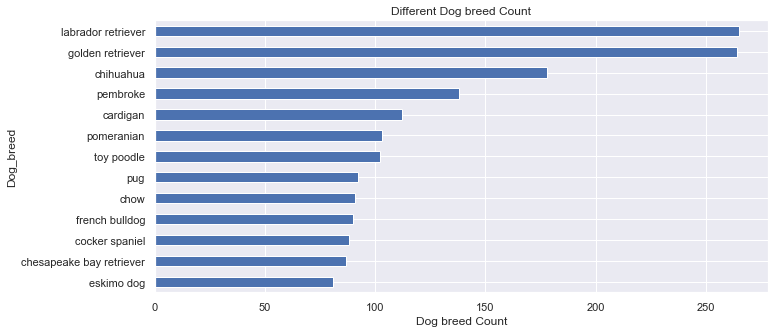

In [62]:
# Visualizing the most shared Dog breed in Analysis
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
master_df[master_df.is_dog].dog_breed.value_counts()[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed Count' ).set_xlabel('Dog breed Count')
plt.ylabel('Dog_breed')

Charlie    33
Lucy       30
Cooper     30
Oliver     30
Penny      27
           ..
Wafer       3
Dewey       3
Ridley      3
Kallie      3
Tiger       3
Name: name, Length: 939, dtype: int64

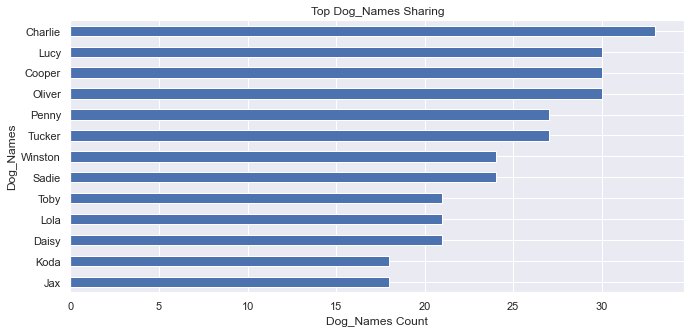

In [63]:
# Visualizing the most Dog_Names sharing in our Ananlysis
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
master_df.name.value_counts()[12::-1].plot(kind='barh', figsize=(11,5), title = 'Top Dog_Names Sharing' ).set_xlabel('Dog_Names Count')
plt.ylabel('Dog_Names')
master_df['name'].value_counts()

In [64]:
df_prediction_level_1 = master_df[master_df['prediction_level'] ==1]
df_prediction_level_2 = master_df[master_df['prediction_level'] ==2]
df_prediction_level_3 = master_df[master_df['prediction_level'] ==3]

Text(0, 0.5, 'Dog_breed')

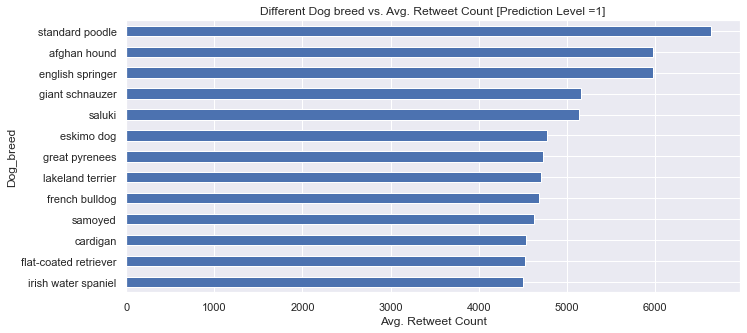

In [65]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_1[df_prediction_level_1.is_dog].groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Avg. Retweet Count [Prediction Level =1]').set_xlabel('Avg. Retweet Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

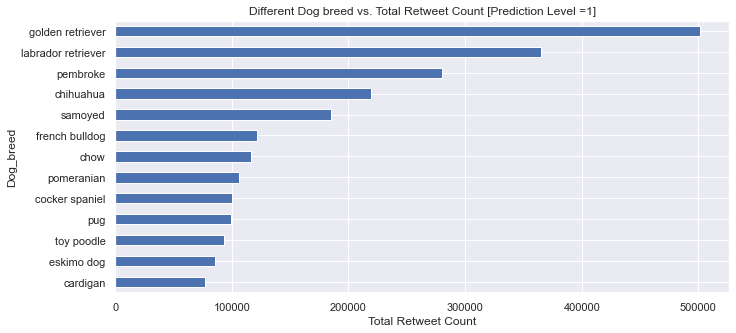

In [66]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_1[df_prediction_level_1.is_dog].groupby(['dog_breed']).retweet_count.sum().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Total Retweet Count [Prediction Level =1]').set_xlabel('Total Retweet Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

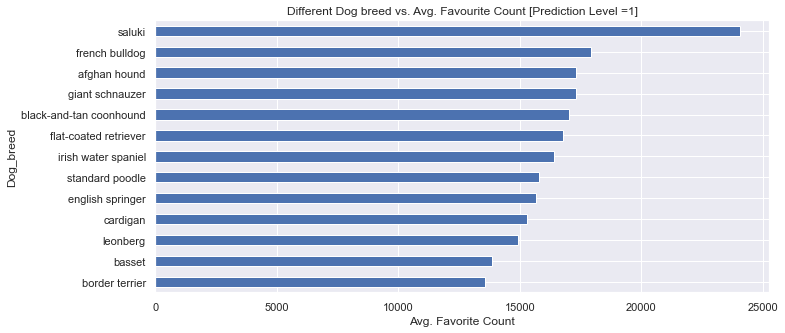

In [67]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_1[df_prediction_level_1.is_dog].groupby(['dog_breed']).favorite_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Avg. Favourite Count [Prediction Level =1]').set_xlabel('Avg. Favorite Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

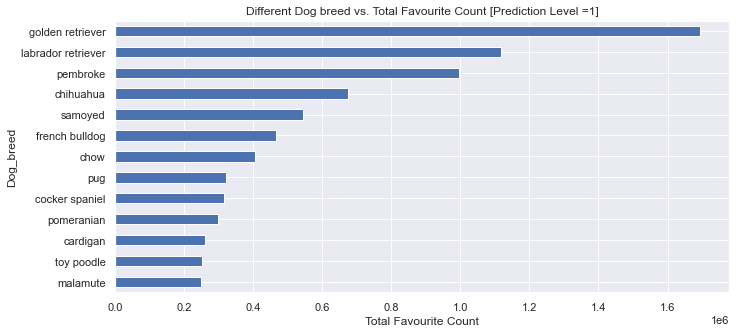

In [68]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_1[df_prediction_level_1.is_dog].groupby(['dog_breed']).favorite_count.sum().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Total Favourite Count [Prediction Level =1]').set_xlabel('Total Favourite Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

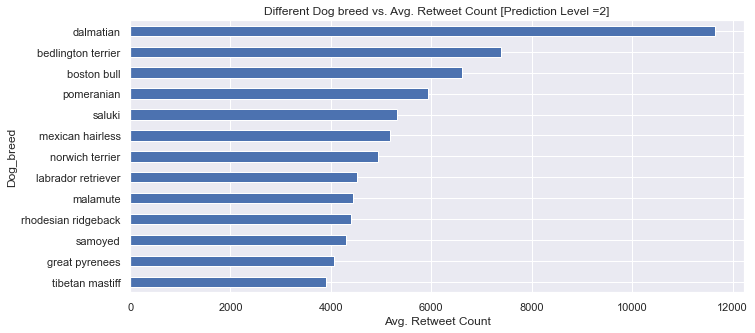

In [69]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_2[df_prediction_level_2.is_dog].groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Avg. Retweet Count [Prediction Level =2]').set_xlabel('Avg. Retweet Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

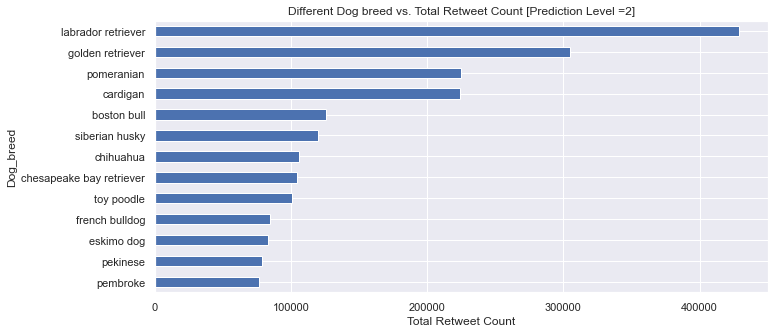

In [70]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_2[df_prediction_level_2.is_dog].groupby(['dog_breed']).retweet_count.sum().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Total Retweet Count [Prediction Level =2]').set_xlabel('Total Retweet Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

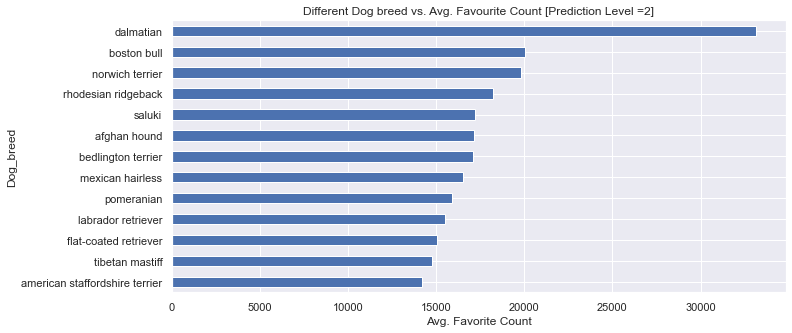

In [71]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_2[df_prediction_level_2.is_dog].groupby(['dog_breed']).favorite_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Avg. Favourite Count [Prediction Level =2]').set_xlabel('Avg. Favorite Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

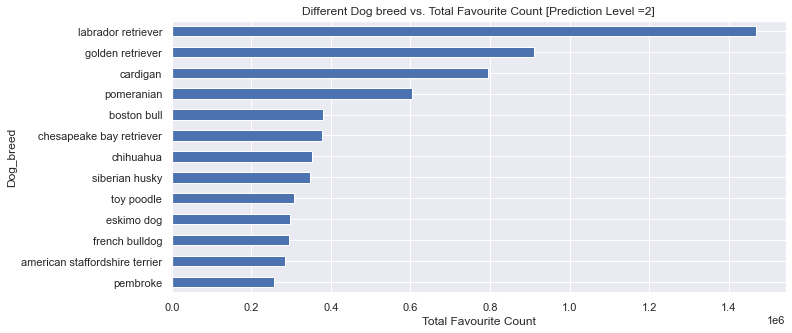

In [72]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_2[df_prediction_level_2.is_dog].groupby(['dog_breed']).favorite_count.sum().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Total Favourite Count [Prediction Level =2]').set_xlabel('Total Favourite Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

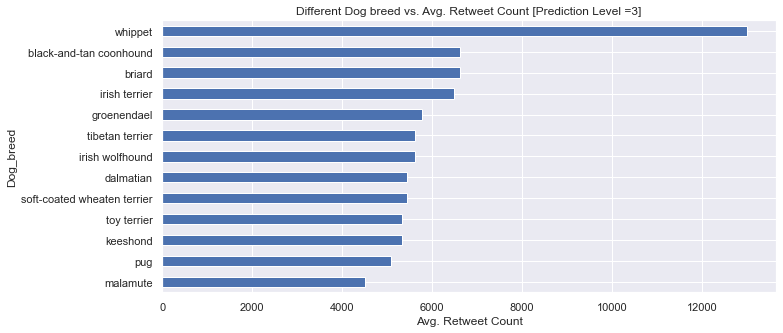

In [73]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_3[df_prediction_level_3.is_dog].groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Avg. Retweet Count [Prediction Level =3]').set_xlabel('Avg. Retweet Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

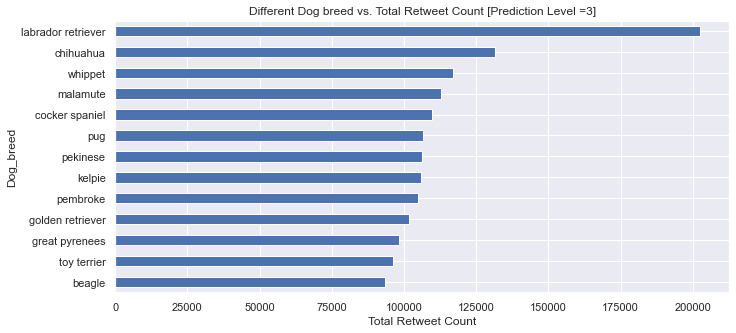

In [74]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_3[df_prediction_level_3.is_dog].groupby(['dog_breed']).retweet_count.sum().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Total Retweet Count [Prediction Level =3]').set_xlabel('Total Retweet Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

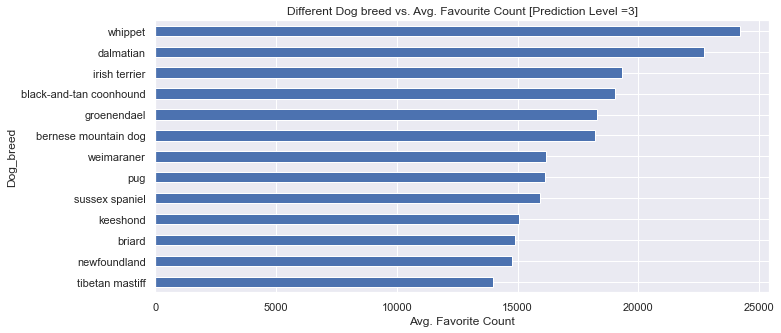

In [75]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_3[df_prediction_level_3.is_dog].groupby(['dog_breed']).favorite_count.mean().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Avg. Favourite Count [Prediction Level =3]').set_xlabel('Avg. Favorite Count')
plt.ylabel('Dog_breed')

Text(0, 0.5, 'Dog_breed')

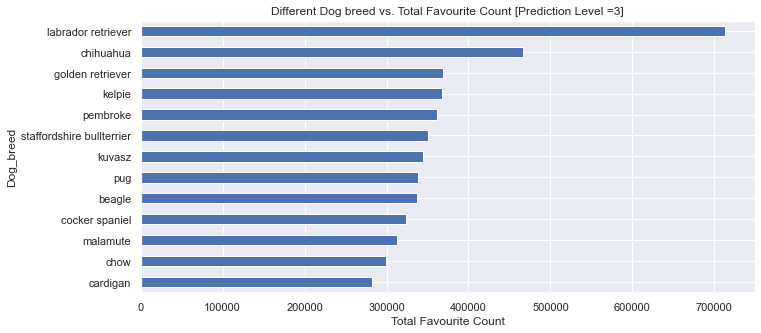

In [76]:
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
df_prediction_level_3[df_prediction_level_3.is_dog].groupby(['dog_breed']).favorite_count.sum().sort_values(ascending=False)[12::-1].plot(kind='barh', figsize=(11,5), title = 'Different Dog breed vs. Total Favourite Count [Prediction Level =3]').set_xlabel('Total Favourite Count')
plt.ylabel('Dog_breed')

In [77]:
dog_stage_avg_retweet_count = master_df.groupby('dog_stage').retweet_count.mean()

In [78]:
dog_stage_avg_favorite_count = master_df.groupby('dog_stage').favorite_count.mean()
dog_stage_avg_retweet_count.index

Index(['doggo', 'doggo-pupper', 'doggo-puppo', 'doggofloofer', 'floofer',
       'pupper', 'puppo'],
      dtype='object', name='dog_stage')

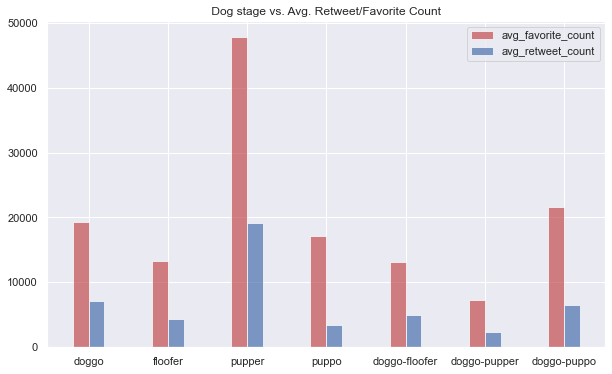

In [79]:
# Visualizing Dog_Stages vs. Avg. Retweet/Favourite Count 
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
width = 0.2
ind = np.arange(len(dog_stage_avg_favorite_count))

red_bars = plt.bar(ind, dog_stage_avg_favorite_count, width, color='r', alpha=.7, label='avg_favorite_count')
blue_bars = plt.bar(ind + width, dog_stage_avg_retweet_count, width, color='b', alpha=.7, label='avg_retweet_count')

plt.ylabel('')
plt.xlabel('')
plt.title(' Dog stage vs. Avg. Retweet/Favorite Count ')
locations = ind + width / 2  # xtick locations
labels = ['doggo', 'floofer', 'pupper', 'puppo', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo']  # xtick labels

plt.xticks(locations, labels)
# # legend
plt.legend()

In [80]:
# Visualizing Most Sources iteracting with WeRateDogs Twitter Account

master_df['source'].value_counts()

Twitter for iPhone    5796
Twitter Web Client      84
TweetDeck               33
Name: source, dtype: int64

In [81]:
# visualizing Most Rated Dog_names 
master_df.name.value_counts()

Charlie    33
Lucy       30
Cooper     30
Oliver     30
Penny      27
           ..
Wafer       3
Dewey       3
Ridley      3
Kallie      3
Tiger       3
Name: name, Length: 939, dtype: int64

# ---------------------------------------------------------------------------------------------------------------